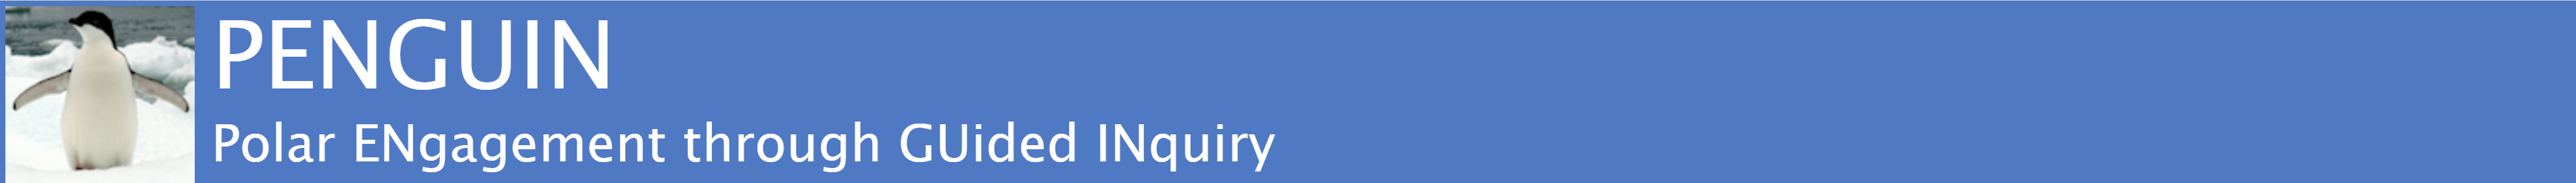

<p style ='text-align: center'>
<img src="https://media.giphy.com/media/ehaMUMJMAPdQaCJHdH/giphy.gif" height="700" width="700" align="center">
</p> 

### Learning Objectives
1. Recognize the similarities and differences between the three species of pygoscelid penguins.
2. Learn to find and download penguin population data.
3. Analyze trends in penguin populations by plotting and modeling data.
4. Use basic linear models to estimate past and future populations.

<a id='1945'></a>
# Introduction
In this module, you will explore population trends of adélie, chinstrap, and gentoo penguins in one area of the Antarctic Peninsula. These species are evolutionarily related; they all occupy the genus *Pygoscelis*, and are therefore commonly referred to as pygoscelids. Yet, although these species are closely related and live side-by-side in some areas, changes in the Antarctic ecosystem are affecting them very differently. Below, you can read some background information about each species before you begin exploring population data.  

<div>
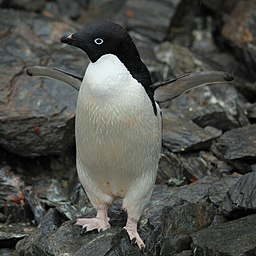
</div>

### Adélie Penguin (*Pygoscelis adeliae*)

Adélie penguins are medium-sized penguins that live exclusively in Antarctic coasts and waters, unlike the other two pygoscelids. Adélies feed mostly on antarctic krill (*euphasia superba*), a species of small marine crustacean that is also eaten by some species of whales and seals. Physically, adélie penguins can be distinguished by the ring of white feathers around each eye.



<div>
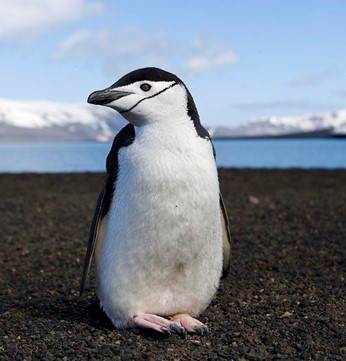
</div>

### Chinstrap Penguin (*Pygoscelis antarctica*)

Chinstrap penguins are easily identifiable by their black "cap" of plumage and the thin band of black feathers which runs under their chins. This species has a large range, nesting on subantarctic and Antarctic islands as well as the Antarctic Penninsula itself. Like adélie  penguins, chinstraps are specialist predators of antarctic krill ; these tiny crustaceans comprise 95-99% of their diets!



<div>
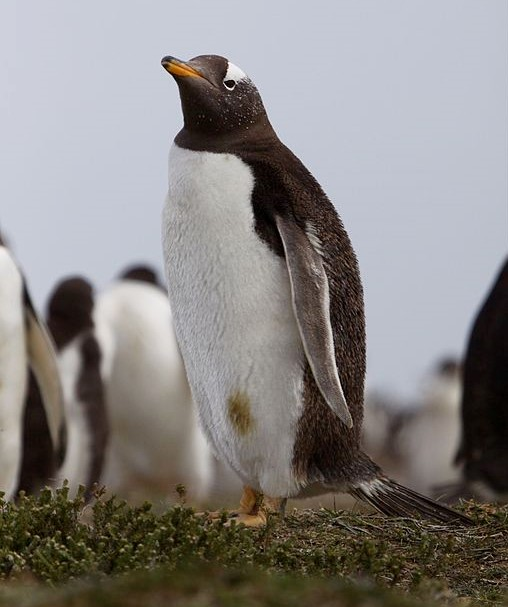
</div>


### Gentoo Penguin (*Pygoscelis papua*)

Gentoo penguins are the largest species of pygoscelid, and the third-largest species of penguin in the world. They inhabit the Antarctic Penninsula, as well as several subantarctic islands. Gentoo penguins are the fastest-swimming bird in the world, reaching speeds of 22 miles per hour. They form colonies only in ice-free areas, and can be distinguished from other pygoscelids by the white feathers above their eyes.



<a id='1946'></a>
# Part 1: Downloading penguin population data

You can download penguin population data from the website of Mapping Application for Penguin Populations and Projected Dynamics, or MPAPPPD. 

1. Use this link to access the MAPPPD Website http://www.penguinmap.com/mapppd.  
2. Click on the "Search by Site" tab under the map interface, and then click on the "List all Sites" button. From the list of sites, select "Petermann Island," "Orne Islands," and "Neko Harbor (Andvord Bay)."  
3. After you click "Select Sites," the three sites will appear in the map interface. Examine the map of the Antarctic Penninsula below; what is the name of the island directly adjacent to the three sites we've selected? Zooming out in the MAPPPD interface (using the "-" button in the upper left) may be helpful.
4. Once you have determined the name of the island, select the "Download" tab in MAPPPD. Select "Download all Count data available within your query". Once the data file is downloaded, open it to examine its contents.  

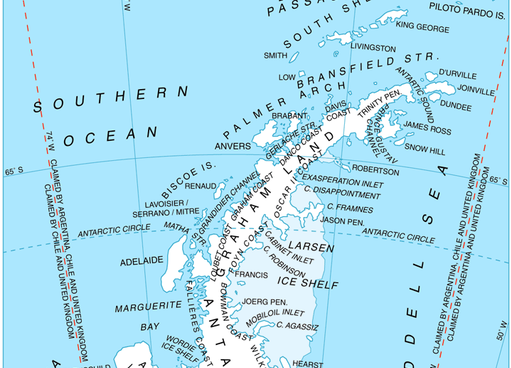

<a id='1947'></a>
# Part 2: Importing and plotting nest data

The cell below imports libraries that we will need to import and analyze the nest data. Run this cell and the ones below by clicking on them and selecting the blue play button to the left, or by pressing shift and enter simultaneously on your keyboard.

In [1]:
#Run this cell without modifying
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from penguin_utility import *

pd.set_option("display.max_rows", 5)

In [2]:

%matplotlib notebook

- The next cell of code imports the data we gathered from MAPPPD into a "DataFrame," which looks like a table. 
- We will call the number of penguins the "count." 
- We will name the DataFrame "penguin_counts." 

Read the code below and try to determine which columns from the original data are being imported.

In [3]:
# Bring in the data
count_data = pd.read_excel("Count_data.xlsx")

# Choose columns of interest
penguin_counts = pd.DataFrame(count_data, columns = ['site name', 'common name', 'year', 'count', 'count type'])

# Create another column giving the number of years since 1985
penguin_counts['years after 1985'] = (penguin_counts['year'] - 1985)

In the last cell of code, we named the DataFrame containing all our count data "penguin_counts". Run the cell below to look into the contents of penguin_counts.

In [4]:
penguin_counts

,site name,common name,year,count,count type,years after 1985
0,Neko Harbor (Andvord Bay),gentoo penguin,1987,397,chicks,2
1,Neko Harbor (Andvord Bay),gentoo penguin,1996,934,chicks,11
...,...,...,...,...,...,...
198,Petermann Island,adelie penguin,2018,292,chicks,33
199,Petermann Island,gentoo penguin,2018,3516,nests,33


Now we'll split the DataFrame into three smaller DataFrames, each containing counts for one species at one location over time. 

In [5]:
adelie_counts = penguin_counts.loc[(penguin_counts['common name']=='adelie penguin') & (penguin_counts['count type']=='nests') & (penguin_counts['site name'] == 'Petermann Island'), ['site name', 'common name','years after 1985', 'count', 'count type']]
gentoo_counts = penguin_counts.loc[(penguin_counts['common name']=='gentoo penguin') & (penguin_counts['count type']=='nests') & (penguin_counts['site name']== 'Neko Harbor (Andvord Bay)'), ['site name', 'common name','years after 1985', 'count', 'count type']]
chinstrap_counts = penguin_counts.loc[(penguin_counts['common name']=='chinstrap penguin') & (penguin_counts['count type']=='nests') & (penguin_counts['count'] > 1) & (penguin_counts['site name']=='Orne Islands'), ['site name', 'common name','years after 1985', 'count', 'count type']]

Write the name of one of the new DataFrame containing chinstrap penguin count data in the cell below to look at its contents.

In [6]:
#Write your code here
chinstrap_counts

,site name,common name,years after 1985,count,count type
63,Orne Islands,chinstrap penguin,-1,340,nests
64,Orne Islands,chinstrap penguin,2,860,nests
...,...,...,...,...,...
109,Orne Islands,chinstrap penguin,30,353,nests
111,Orne Islands,chinstrap penguin,31,298,nests


### Plotting Data
Run the block of code below to plot the nest data for each species at each site. Expand the figure by clicking and dragging the grey triangle in the bottom right corner. Examine the plot carefully.

<IPython.core.display.Javascript object>


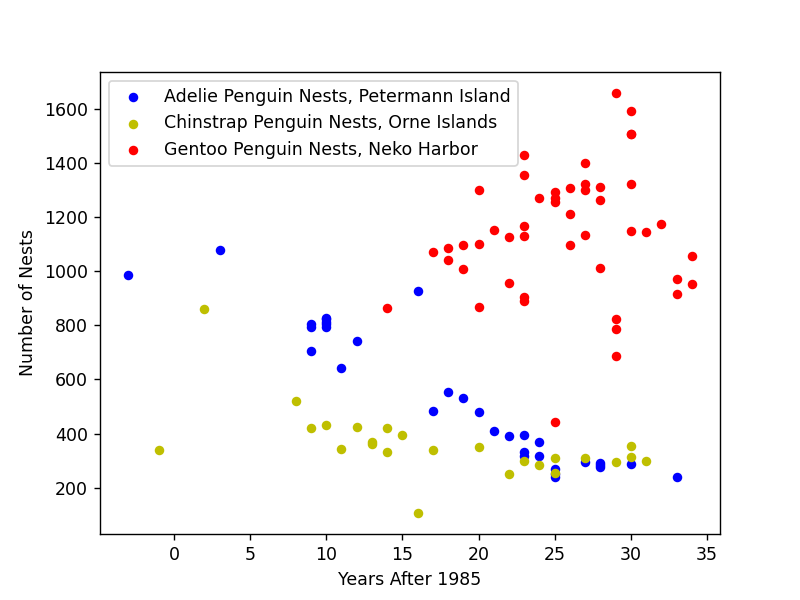

In [7]:

import matplotlib.pyplot as plt
import pandas as pd
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)
gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
ax1.set_xlabel("Years After 1985")
ax1.set_ylabel("Number of Nests")

plt.show()

<a id='1948'></a>
# Part 3: Interpreting nest data with trendlines

<p style ='text-align: center'>
<img src="https://media.giphy.com/media/S8MwZhcheCXyCeoA0I/giphy.gif" height="500" width="500" align="center">
</p> 

In this section, we will model the trends in the penguin populations at our chosen sites. We'll begin by examining trends in adélie penguins. Run the cell below to look at the data we're examining again.

In [8]:
adelie_counts

,site name,common name,years after 1985,count,count type
116,Petermann Island,adelie penguin,-3,987,nests
119,Petermann Island,adelie penguin,3,1080,nests
...,...,...,...,...,...
189,Petermann Island,adelie penguin,30,287,nests
197,Petermann Island,adelie penguin,33,238,nests


Examine the first and last entries of count data for adelie penguins at Petermann Island. How would these entries be represented as points in the graph we made in section 2? What would the x-coordinate represent? What would the y-coordinate represent? 

Treat the first and last entries as points and calculate the slope of a line between the two points. Using the slope and one of the points (first or last entry) calculate the y-intercept of this line. Use a calculator--the numbers will be large. Round values to the nearest tenth. 

When you have found both the slope and the y-intercept, replace "m" and "b" in the equation below with the appropriate values.

In [9]:
adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
x = np.linspace(-5, 35, 100)

#Replace m and b in the line of code below
y = -20.8*x +920


plt.plot(x, y, color='teal')
plt.xlabel('Years after 1985')
plt.ylabel('Number of Nests')
plt.show()

<IPython.core.display.Javascript object>

Run the cell below to look at the count data for chinstrap nests on the Orne Islands. Using the first and last entries, calculate the slope and intercept of a line that models the trend in the number of chinstrap nests, as you did for adelie nests above. Enter the values you find in the next code cell and run the cell to plot a figure. 

In [10]:
chinstrap_counts

,site name,common name,years after 1985,count,count type
63,Orne Islands,chinstrap penguin,-1,340,nests
64,Orne Islands,chinstrap penguin,2,860,nests
...,...,...,...,...,...
109,Orne Islands,chinstrap penguin,30,353,nests
111,Orne Islands,chinstrap penguin,31,298,nests


In [11]:
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Chinstrap Penguin Nests, Orne Islands', color='y')
x = np.linspace(-5, 35, 100)


#Replace m and b with the values you calculated
y = -1.3*x + 320

plt.plot(x, y, color='goldenrod')
plt.xlabel('Year')
plt.ylabel('Number of Nests')
plt.show()

<IPython.core.display.Javascript object>

Repeat the process one final time for the data for gentoo nests at Neko Harbor. Run the cell below, use the first and last entries to calculate slope and intercept of a line, and input those values into the next cell. 

Use the last entry *chronologically* (the most recent entry), not the last one listed in the DataFrame.

In [12]:
gentoo_counts

,site name,common name,years after 1985,count,count type
4,Neko Harbor (Andvord Bay),gentoo penguin,14,864,nests
5,Neko Harbor (Andvord Bay),gentoo penguin,18,1042,nests
...,...,...,...,...,...
61,Neko Harbor (Andvord Bay),gentoo penguin,34,1058,nests
62,Neko Harbor (Andvord Bay),gentoo penguin,33,916,nests


<IPython.core.display.Javascript object>


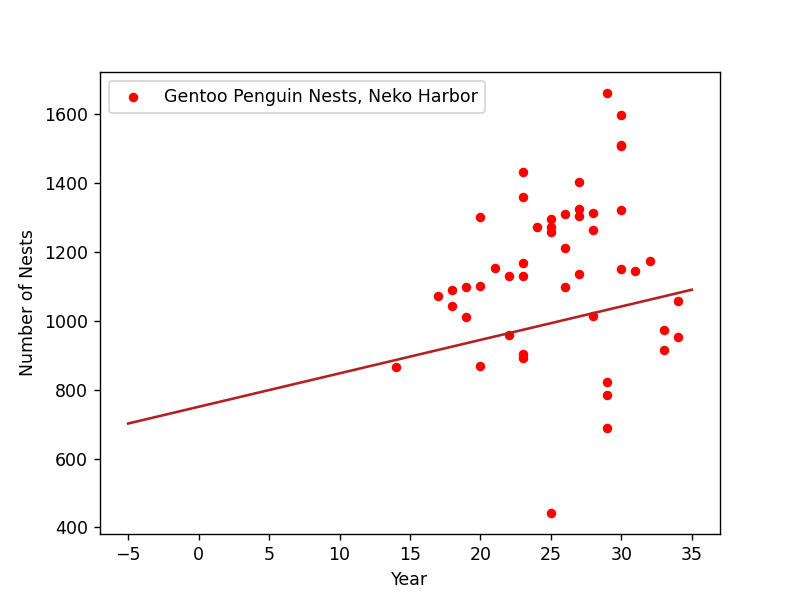

In [13]:
gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Gentoo Penguin Nests, Neko Harbor', color='r')
x = np.linspace(-5, 35, 100)


#Replace m and b with the values you calculated
y = 9.7*x + 750

gentoo_fit = plt.plot(x, y, color='firebrick')
plt.xlabel('Year')
plt.ylabel('Number of Nests')
plt.show()

### Pause for analysis
* How accurately do the lines you added fit the nest data? Why do you think this might be?
* QUESTION ABOUT HOW LINEAR POP TRENDS ARE

Run the following cell of code and expand each of the three plots which generate. Each plot has two associated sliders which allow you to manipulate the slope and y-intercept of the line of best fit. Use the sliders to find the equations of lines which seem fit the nest data better than those you calculated. Record the equation of each line in your notes. 

<IPython.core.display.Javascript object>


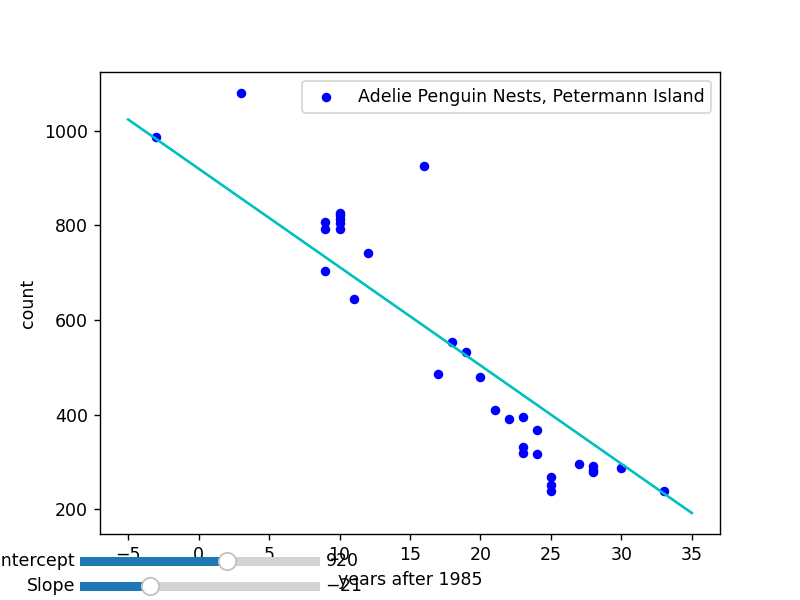

<IPython.core.display.Javascript object>


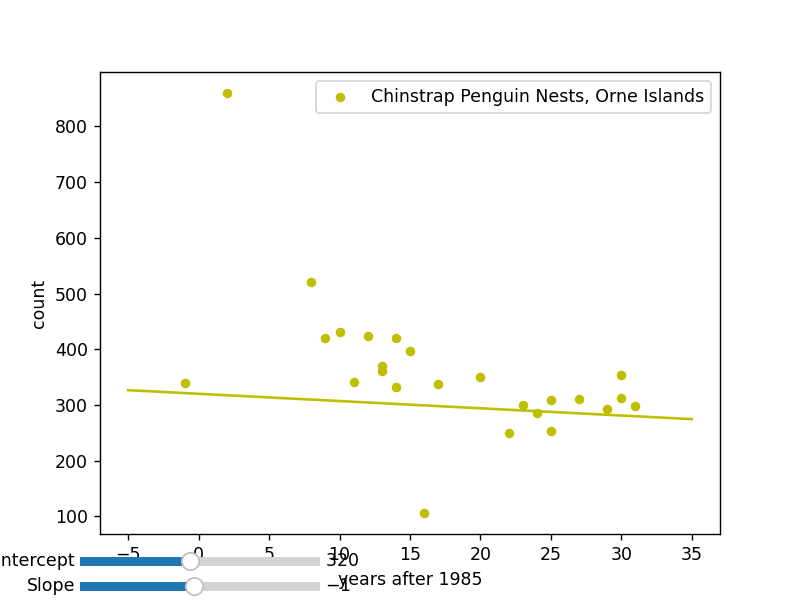

<IPython.core.display.Javascript object>


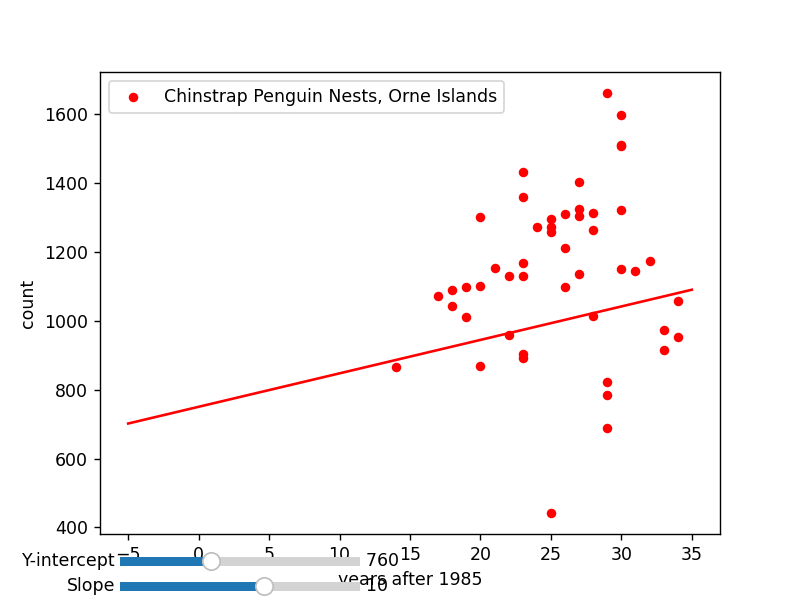

In [14]:

adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')

adelie_slope= -20.8
adelie_y_int=920
adelie_y = (adelie_slope * x) + adelie_y_int
chinstrap_slope= -1.3
chinstrap_y_int=2919.2
chinstrap_y = (chinstrap_slope * x)+ chinstrap_y_int
gentoo_slope=9.7
gentoo_y_int=-18526.3
gentoo_y = (gentoo_slope * x)+ gentoo_y_int
delta_f = 5
adelie_plot, =plt.plot(x, (adelie_slope * x)+ adelie_y_int, color='c')
axcolor='w'
adelie_slope_slider = plt.axes([.1, .008, 0.3, 0.03], facecolor=axcolor)
adelie_y_slider = plt.axes([.1, .05, 0.3, 0.03], facecolor=axcolor)

adelie_m_slide = plt.Slider(adelie_slope_slider, label='Slope', valmin=(-50), valmax=50, valinit=adelie_slope, valstep=1)
adelie_b_slide = plt.Slider(adelie_y_slider, label='Y-intercept', valmin=(0), valmax=1500, valinit=adelie_y_int, valstep=20)

def update(val):
    slope = adelie_m_slide.val
    y_int = adelie_b_slide.val
    adelie_plot.set_ydata((slope*x)+y_int)
    fig.canvas.draw_idle()
    
adelie_m_slide.on_changed(update)
adelie_b_slide.on_changed(update)
plt.show()

chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Chinstrap Penguin Nests, Orne Islands', color='y')
chinstrap_slope= -1.3
chinstrap_y_int=320
chinstrap_y = (chinstrap_slope * x)+ chinstrap_y_int
delta_f = 5
chinstrap_plot, =plt.plot(x, (chinstrap_slope * x)+ chinstrap_y_int, color='y')
axcolor='w'
chinstrap_slope_slider = plt.axes([.1, .008, 0.3, 0.03], facecolor=axcolor)
chinstrap_y_slider = plt.axes([.1, .05, 0.3, 0.03], facecolor=axcolor)

chinstrap_m_slide = plt.Slider(chinstrap_slope_slider, label='Slope', valmin=(-20), valmax=20, valinit=chinstrap_slope, valstep=1)
chinstrap_b_slide = plt.Slider(chinstrap_y_slider, label='Y-intercept', valmin=(0), valmax=700, valinit=chinstrap_y_int, valstep=20)

def update(val):
    slope = chinstrap_m_slide.val
    y_int = chinstrap_b_slide.val
    chinstrap_plot.set_ydata((slope*x)+y_int)
    fig.canvas.draw_idle()
    
chinstrap_m_slide.on_changed(update)
chinstrap_b_slide.on_changed(update)



gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Chinstrap Penguin Nests, Orne Islands', color='r')
gentoo_slope= 9.7
gentoo_y_int=750
gentoo_y = (gentoo_slope * x)+ gentoo_y_int
delta_f = 5
gentoo_plot, =plt.plot(x, (gentoo_slope * x)+ gentoo_y_int, color='r')
axcolor='w'
gentoo_slope_slider = plt.axes([.15, .008, 0.3, 0.03], facecolor=axcolor)
gentoo_y_slider = plt.axes([.15, .05, 0.3, 0.03], facecolor=axcolor)

gentoo_m_slide = plt.Slider(gentoo_slope_slider, label='Slope', valmin=(-50), valmax=50, valinit=gentoo_slope, valstep=1)
gentoo_b_slide = plt.Slider(gentoo_y_slider, label='Y-intercept', valmin=(0), valmax=2000, valinit=gentoo_y_int, valstep=20)

def update(val):
    slope = gentoo_m_slide.val
    y_int = gentoo_b_slide.val
    gentoo_plot.set_ydata((slope*x)+y_int)
    fig.canvas.draw_idle()
    
gentoo_m_slide.on_changed(update)
gentoo_b_slide.on_changed(update)
plt.show()

After you have inspected the three plots above and found a good line of fit for each penguin population, run the block of code below. In the plot which generates, the three lines of fit have been generated by a technique called linear regression, which you may learn in an upper-level math course. 

In [15]:
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)
for counts in [gentoo_counts, chinstrap_counts, adelie_counts]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(counts['years after 1985'],counts['count'])
    line = slope*x+intercept
    plt.plot(x, line, color=np.random.rand(3,), label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Year')
plt.ylabel('Number of Nests')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

### Pause for Analysis
* How close were the lines you found to those generated by linear regression?
* According to generated lines of fit, in about which year did the population of adelie penguins fall below that of chinstrap penguins?

<a id='1949'></a>
# Part 4: Estimating past and future penguin populations
<p style ='text-align: center'>
<img src="https://media.giphy.com/media/TjpgUiOjUIIQ6A8wfN/giphy.gif" height="500" width="500" align="center">
</p> 

So far, we have modeled trends in penguin populations with straight lines. Now we can use our models to fill in some gaps in our dataset and even to estimate penguin populations in the distant past as well as the future. 

Let's imagine that we are particularly interested in trends in penguin colonies near Anvers Island between 2005 and 2010. Our data for this period at our three sites is nearly complete; however, in one year the data for a particular site is missing.

Run the cell below to generate another plot of the penguin nests over time at our chosen sites. Below the graph is a button displaying a small rectangle. This button allows you to zoom in on the graph by drawing a rectangle around the area of interest. Draw a rectangle containing all plot data between 2005 and 2010. Identify the year, and the species of penguin, for which nest data is missing.

If you accidentally zoom into the wrong area, click on the button displaying a house to return to the original view.

In [19]:
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)
plt.show()

Pick one set of lines from the section above. You may select those you calculated from two points, those you created with sliders, or those which were generated using linear regression. 

Using the equation for the appropriate species/location, calculate the estimated number of nests at that site in the year where data is absent.

Input the appropriate year and the number of nests you estimated in the form of a point in the cell below, and run the cell. Keep in mind that our graph x-axis is years since 1985.

In [17]:
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)

plt.plot([21], [431], marker='o', markersize=5, color="goldenrod", label='Modeled Point')
plt.xlim(19,26)
plt.legend()
plt.show()

The kind of estimation we just performed is called *interpolation*, the estimate of a point which lies between known data points. Next we'll use our model (our lines of fit) to *extrapolate*, or estimate points which lie outside the bounds of known data.

The majority of our count data falls between the years 1985 and 2020. Having modeled the trends over past 35 years, it would be interesting to consider what populations might have been in the more distant past. Using the same trendline equations, calculate the number of nests which would have been at each site in 1900.

Enter the x and y coordinates of your nest count estimates for each site in 1900 below, and run the cell to see your points plotted.

In [18]:
ax1= adelie_counts.plot(kind='scatter', x='years after 1985', y='count', label = 'Adelie Penguin Nests, Petermann Island', color='b')
gentoo_counts.plot(kind='scatter', x='years after 1985', y='count', label= 'Gentoo Penguin Nests, Neko Harbor', color='r', ax=ax1)
chinstrap_counts.plot(kind='scatter', x='years after 1985', y='count', label='Chinstrap Penguin Nests, Orne Islands', color = 'y', ax=ax1)

for counts in [gentoo_counts, chinstrap_counts, adelie_counts]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(counts['years after 1985'],counts['count'])
    line = slope*x+intercept
    plt.plot(x, line, color=np.random.rand(3,), label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.plot([-85], [406], marker='o', markersize=5, color="goldenrod", label='Estimated number of chinstrap penguin nests, Orne Islands ')
plt.plot([-85], [-90], marker='o', markersize=5, color="firebrick", label='Estimated number of gentoo penguin nests, Neko Harbor')
plt.plot([-85], [2705], marker='o', markersize=5, color="teal", label='Estimated number of adelie penguin nests, Petermann Island')
plt.xlim(-90,35)
plt.legend()
plt.show()


### Final Challenge
Calculate the year in which the two sites with declining nest populations will reach zero nests. Round to the nearest year if you recieve a decimal answer. Plot the points you derive above and check to make sure you are correct.